<a href="https://colab.research.google.com/github/Akash-mf/Global-Sales-Performance-Analysis-Python-projec/blob/main/Global_Sales_Performance_Analysis_Python_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📊 Sales Analysis Project (Google Colab)
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Colab usually has seaborn pre-installed

plt.rcParams["figure.figsize"] = (10,6)

# ======================
# 1. Load Dataset
# ======================
from google.colab import files
uploaded = files.upload()  # Upload your CSV (Amazon Sales data.csv)

# Adjust file name accordingly
df = pd.read_csv("Amazon Sales data.csv")
print(df.shape)
df.head()


Saving Amazon Sales data.csv to Amazon Sales data.csv
(100, 14)


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
#1. Data Cleaning & Preparation
# Handle duplicates
df.drop_duplicates(inplace=True)

# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Extract Year, Month
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["MonthName"] = df["Order Date"].dt.strftime("%b")

# Profit Margin %
df["Profit Margin %"] = (df["Total Profit"] / df["Total Revenue"]) * 100

# Average Order Value (AOV)
df["AOV"] = df["Total Revenue"] / df["Units Sold"]

df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,MonthName,Profit Margin %,AOV
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,May,37.550924,255.28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,Aug,43.067574,205.70
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,May,19.386987,651.21
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,Jun,25.830654,9.33
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,Feb,19.386987,651.21


In [ ]:
#2. Descriptive Statistics
print("Total Revenue:", df["Total Revenue"].sum())
print("Total Profit:", df["Total Profit"].sum())
print("Total Units Sold:", df["Units Sold"].sum())
print("Average Order Value:", df["AOV"].mean())

print("\nRevenue Stats")
print(df["Total Revenue"].describe())

print("\nProfit Stats")
print(df["Total Profit"].describe())


Total Revenue: 137348768.31
Total Profit: 44168198.39999999
Total Units Sold: 512871
Average Order Value: 276.76130000000006

Revenue Stats
count    1.000000e+02
mean     1.373488e+06
std      1.460029e+06
min      4.870260e+03
25%      2.687212e+05
50%      7.523144e+05
75%      2.212045e+06
max      5.997055e+06
Name: Total Revenue, dtype: float64

Profit Stats
count    1.000000e+02
mean     4.416820e+05
std      4.385379e+05
min      1.258020e+03
25%      1.214436e+05
50%      2.907680e+05
75%      6.358288e+05
max      1.719922e+06
Name: Total Profit, dtype: float64


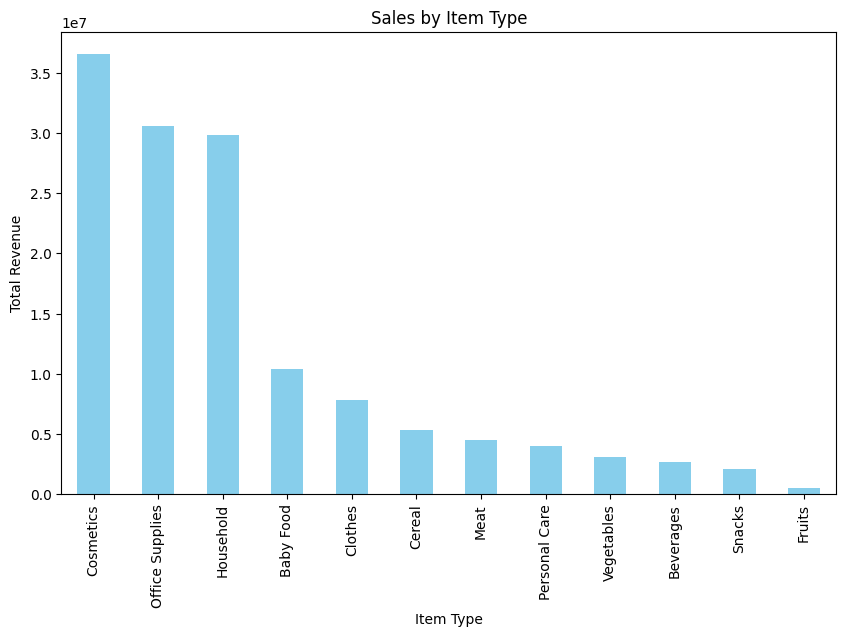

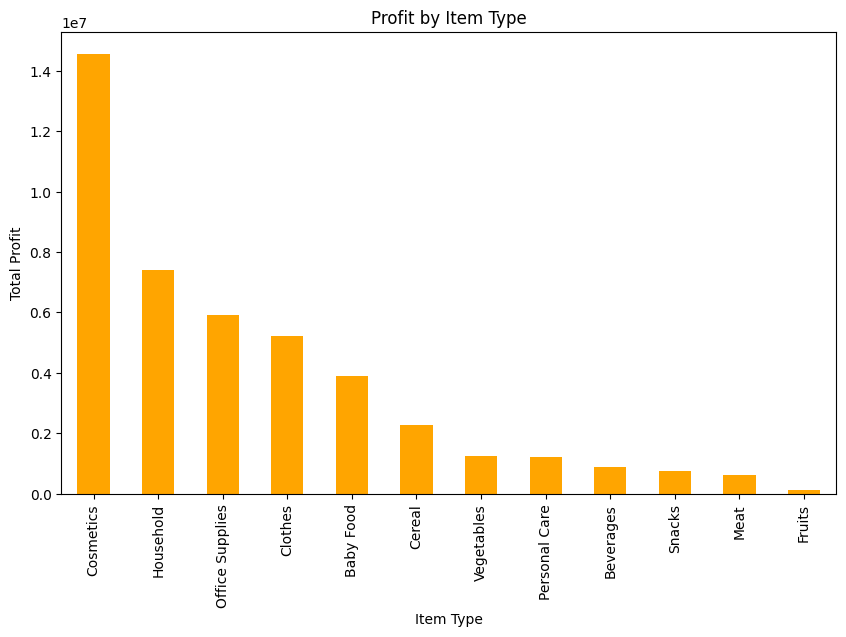

In [ ]:
#3. Category & Product Analysis
# Sales by Item Type
item_sales = df.groupby("Item Type")["Total Revenue"].sum().sort_values(ascending=False)
item_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Item Type")
plt.ylabel("Total Revenue")
plt.show()

# Profit by Item Type
item_profit = df.groupby("Item Type")["Total Profit"].sum().sort_values(ascending=False)
item_profit.plot(kind="bar", color="orange")
plt.title("Profit by Item Type")
plt.ylabel("Total Profit")
plt.show()


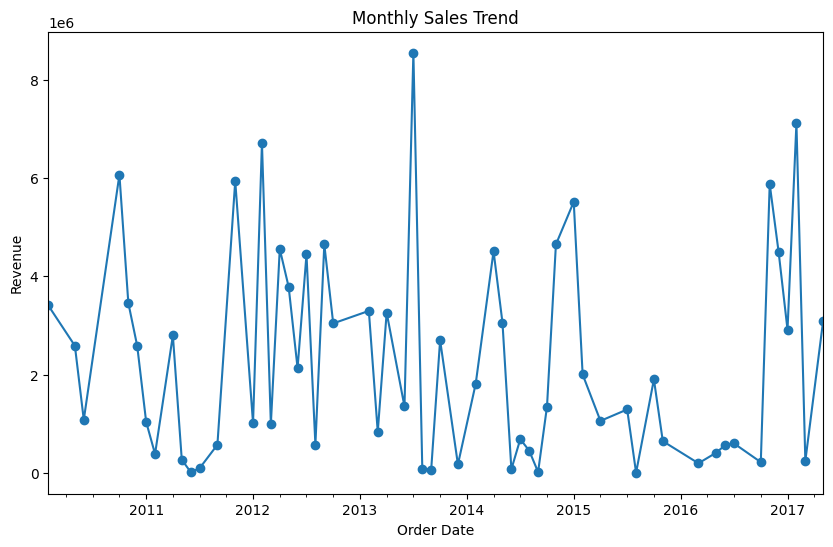

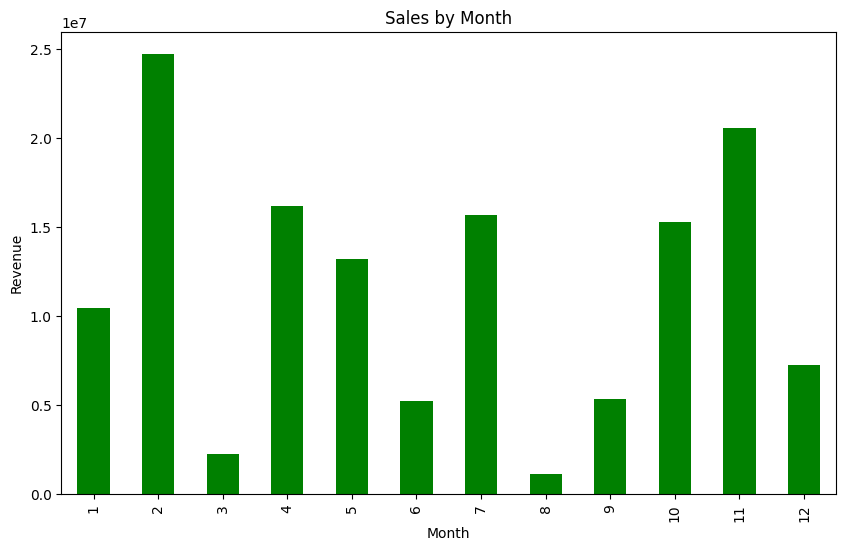

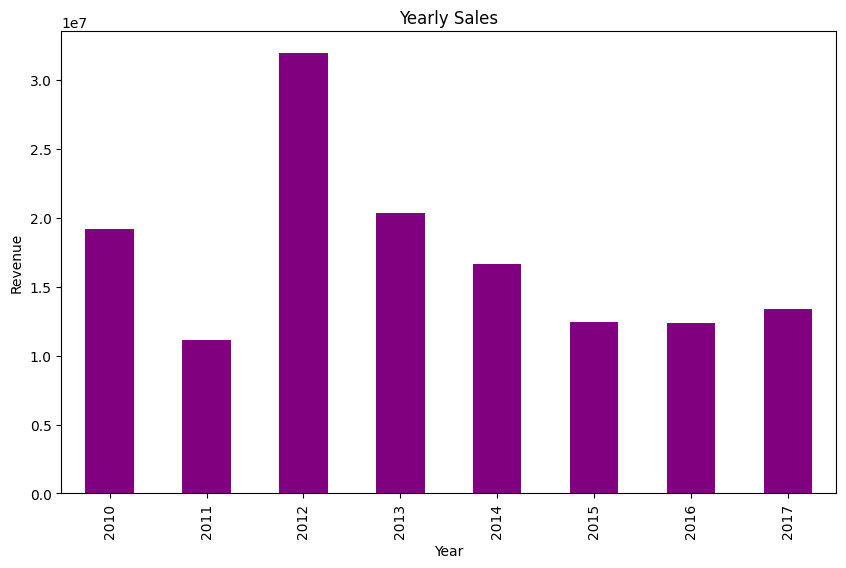

In [ ]:
#4. Time-Based Analysis

# Monthly Sales Trend
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Total Revenue"].sum()
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()

# Sales by Month (seasonality)
month_sales = df.groupby("Month")["Total Revenue"].sum()
month_sales.plot(kind="bar", color="green")
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# Yearly Sales
yearly_sales = df.groupby("Year")["Total Revenue"].sum()
yearly_sales.plot(kind="bar", color="purple")
plt.title("Yearly Sales")
plt.ylabel("Revenue")
plt.show()


                                   Total Revenue  Total Profit
Region                                                        
Sub-Saharan Africa                   39672031.43   12183211.40
Europe                               33368932.11   11082938.63
Asia                                 21347091.02    6113845.87
Australia and Oceania                14094265.13    4722160.03
Middle East and North Africa         14052706.58    5761191.86
Central America and the Caribbean     9170385.49    2846907.85
North America                         5643356.55    1457942.76


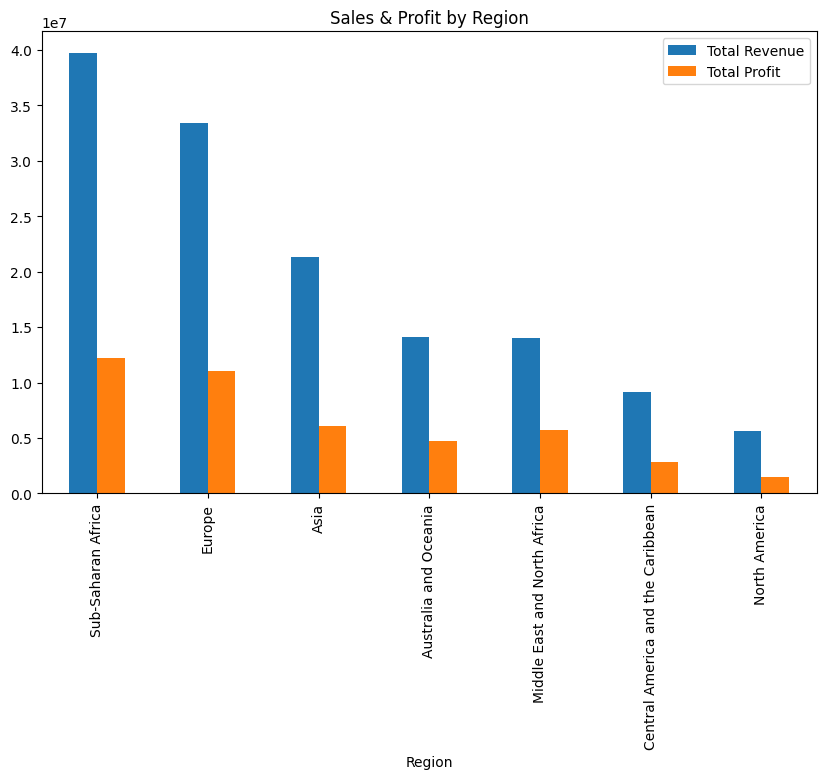

In [ ]:
#5. Regional Analysis
region_summary = df.groupby("Region")[["Total Revenue", "Total Profit"]].sum().sort_values("Total Revenue", ascending=False)
print(region_summary)

region_summary.plot(kind="bar")
plt.title("Sales & Profit by Region")
plt.show()

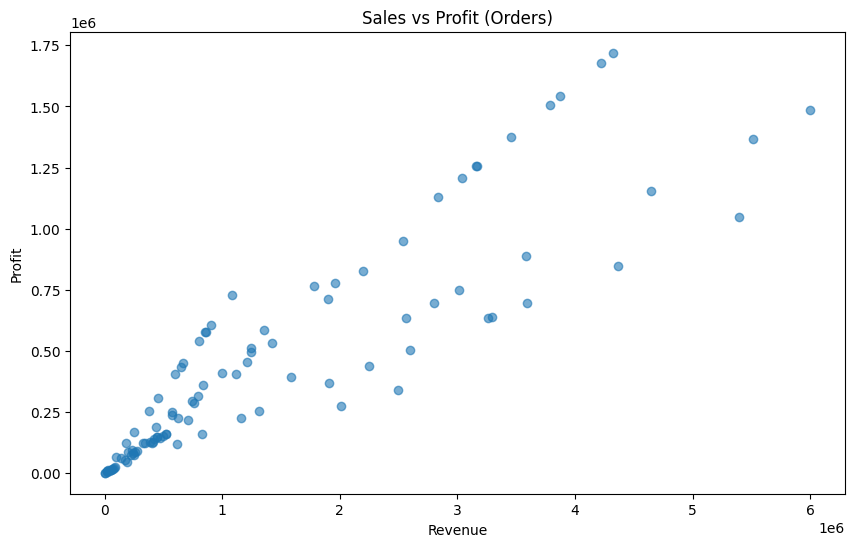

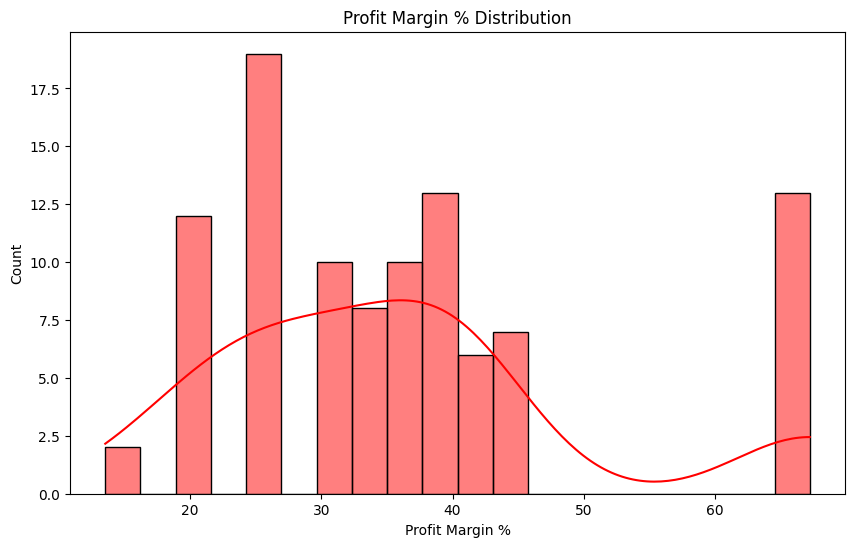

In [ ]:
#6. Profitability Analysis
# Sales vs Profit Scatter
plt.scatter(df["Total Revenue"], df["Total Profit"], alpha=0.6)
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.title("Sales vs Profit (Orders)")
plt.show()

# Profit Margin Distribution
sns.histplot(df["Profit Margin %"].dropna(), bins=20, kde=True, color="red")
plt.title("Profit Margin % Distribution")
plt.show()

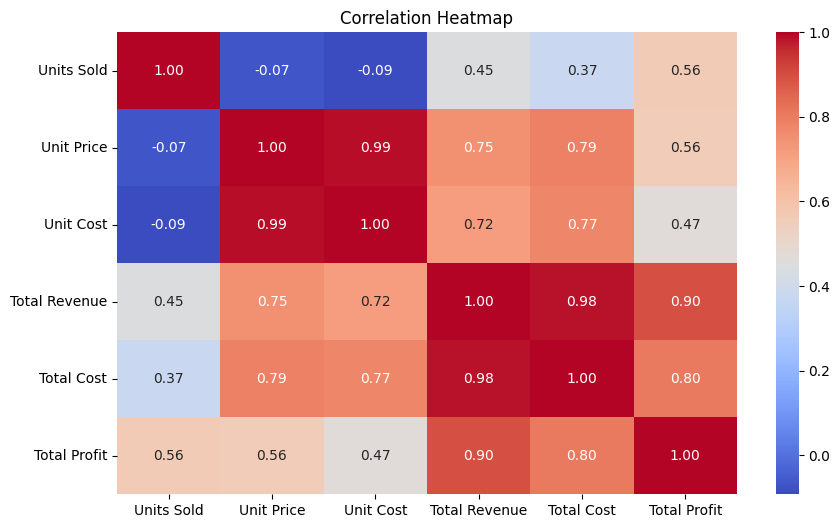

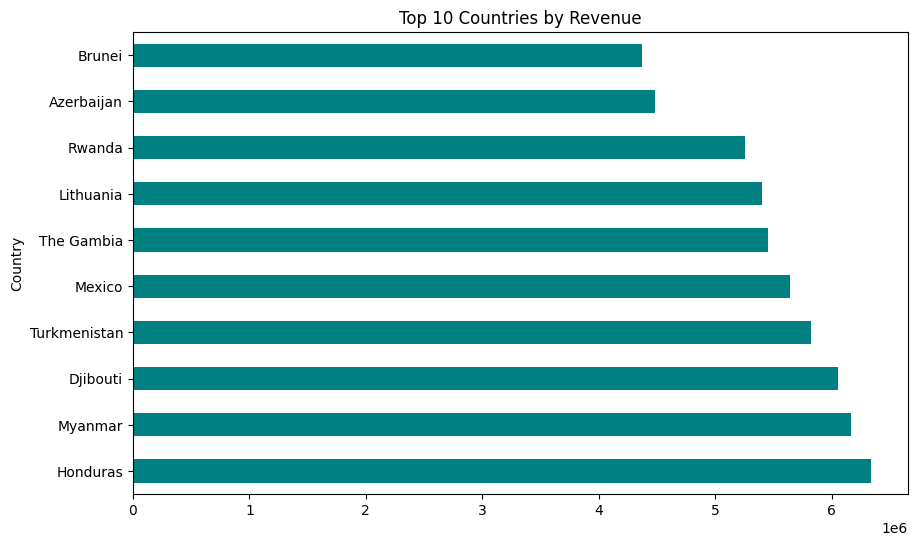

In [ ]:
#7. Advanced Insights
# Correlation Heatmap
numeric_cols = ["Units Sold", "Unit Price", "Unit Cost", "Total Revenue", "Total Cost", "Total Profit"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Top 10 Countries by Revenue
top_countries = df.groupby("Country")["Total Revenue"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="barh", color="teal")
plt.title("Top 10 Countries by Revenue")
plt.show()